PCA analysis for generated features from P180_2,3,4 and P190_2,3,4

To plot cyclic voltammetry data from different subfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from tables.table import Column
import seaborn as sns
import scipy.stats
import plotly.express as px
from IPython.display import clear_output
from scipy.interpolate import interp1d

In [ ]:
#set working directory containg the Data
os.chdir('/content/drive/Shareddrives/R&D/Projects/DataforManuscript/')

In [ ]:
#!pip install plotly

#Import processed EIS features and clean the data

In [ ]:
# read generated features from the folder Generated Folders and store the featrues in Feature_dict
Feature_dict={}

for pack in ['P190_02','P190_03','P190_04','P180_02','P180_03','P180_04']:
  files=glob.glob(os.path.join('Generated Features',  pack+'*'))
  Feature_dict[pack]=pd.read_csv(files[-1]).set_index('Unnamed: 0')


In [ ]:
#populate features from all packs into one dataframe
feature_names=["xofymax","intercept","diameter","tailhead","slope","shape","shoulder","ymax","pack","scan","cell","xofymax-intercept","tailhead-intercept","shoulder-intercept"]
dict={}

for pack in ['P190_02','P190_03','P190_04','P180_02','P180_03','P180_04']:
  dict[pack]=pd.DataFrame(columns=feature_names)
  for i in range(0,8):
    t=Feature_dict[pack][0+5*i:5+5*i].melt()
    t=t.set_index(pd.Index([pack+"_"+"cell"+str(j%5+1)+"_"+"scan"+"{:02d}".format(j//5+1) for j in range(0,len(t["variable"]))]))
    t=t.drop("variable",axis=1)
    #t.columns=[feature_names[i]]
    dict[pack][feature_names[i]]=t

  #add pack, cell, scan to df_features
  dict[pack]["pack"]=pack
  dict[pack]["scan"]=[ "scan"+"{:02d}".format(j//5+1) for j in range(0,len(t))]
  dict[pack]["cell"]=[ "cell"+str(j%5+1) for j in range(0,len(t))]

  #subtract intercept from xofymax, tailhead, shoulder
  dict[pack]["xofymax-intercept"]=dict[pack]["xofymax"]-dict[pack]["intercept"]
  dict[pack]["tailhead-intercept"]=dict[pack]["tailhead"]-dict[pack]["intercept"]
  dict[pack]["shoulder-intercept"][dict[pack]["shoulder"]!=0]=dict[pack]["shoulder"][dict[pack]["shoulder"]!=0]-dict[pack]["intercept"][dict[pack]["shoulder"]!=0]

df_features=pd.concat([dict[pack] for pack in ['P190_02','P190_03','P190_04','P180_02','P180_03','P180_04']])

<ipython-input-41-47e4605bb70a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict[pack]["shoulder-intercept"][dict[pack]["shoulder"]!=0]=dict[pack]["shoulder"][dict[pack]["shoulder"]!=0]-dict[pack]["intercept"][dict[pack]["shoulder"]!=0]
<ipython-input-41-47e4605bb70a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict[pack]["shoulder-intercept"][dict[pack]["shoulder"]!=0]=dict[pack]["shoulder"][dict[pack]["shoulder"]!=0]-dict[pack]["intercept"][dict[pack]["shoulder"]!=0]
<ipython-input-41-47e4605bb70a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [ ]:
#set zero values to NaN in the dataframe
df_features[df_features==0]=float('NaN')
df_features

,xofymax,intercept,diameter,tailhead,slope,shape,shoulder,ymax,pack,scan,cell,xofymax-intercept,tailhead-intercept,shoulder-intercept
P190_02_cell1_scan01,0.039490,0.028157,0.024204,0.051689,0.000595,1.396610,NaN,0.006979,P190_02,scan01,cell1,0.011334,0.023532,NaN
P190_02_cell2_scan01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P190_02,scan01,cell2,NaN,NaN,NaN
P190_02_cell3_scan01,0.034344,0.022329,0.024321,0.046020,0.036738,1.395833,NaN,0.006938,P190_02,scan01,cell3,0.012015,0.023692,NaN
P190_02_cell4_scan01,0.037734,0.025710,0.024535,0.049369,0.034607,1.400697,NaN,0.006830,P190_02,scan01,cell4,0.012024,0.023659,NaN
P190_02_cell5_scan01,0.043150,0.031312,0.023537,0.053931,0.183925,1.388514,NaN,0.006750,P190_02,scan01,cell5,0.011837,0.022619,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P180_04_cell1_scan04,0.033870,0.024442,0.019360,0.043298,0.802903,1.302548,NaN,0.006176,P180_04,scan04,cell1,0.009428,0.018856,NaN
P180_04_cell2_scan04,0.033249,0.024011,0.018590,0.042035,0.658730,1.312903,NaN,0.005874,P180_04,scan04,cell2,0.009238,0.018024,NaN
P180_04_cell3_scan04,0.031804,0.022018,0.020454,0.042136,0.869347,1.347826,NaN,0.006662,P180_04,scan04,cell3,0.009786,0.020118,NaN
P180_04_cell4_scan04,0.036202,0.026663,0.018382,0.044421,0.868618,1.317308,NaN,0.005813,P180_04,scan04,cell4,0.009540,0.017759,NaN


In [ ]:
featuresToPlot=df_features
#discard points with shape outliers
featuresToPlot.loc[abs(featuresToPlot["shape"]-1.36)>0.2]=float('NaN')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


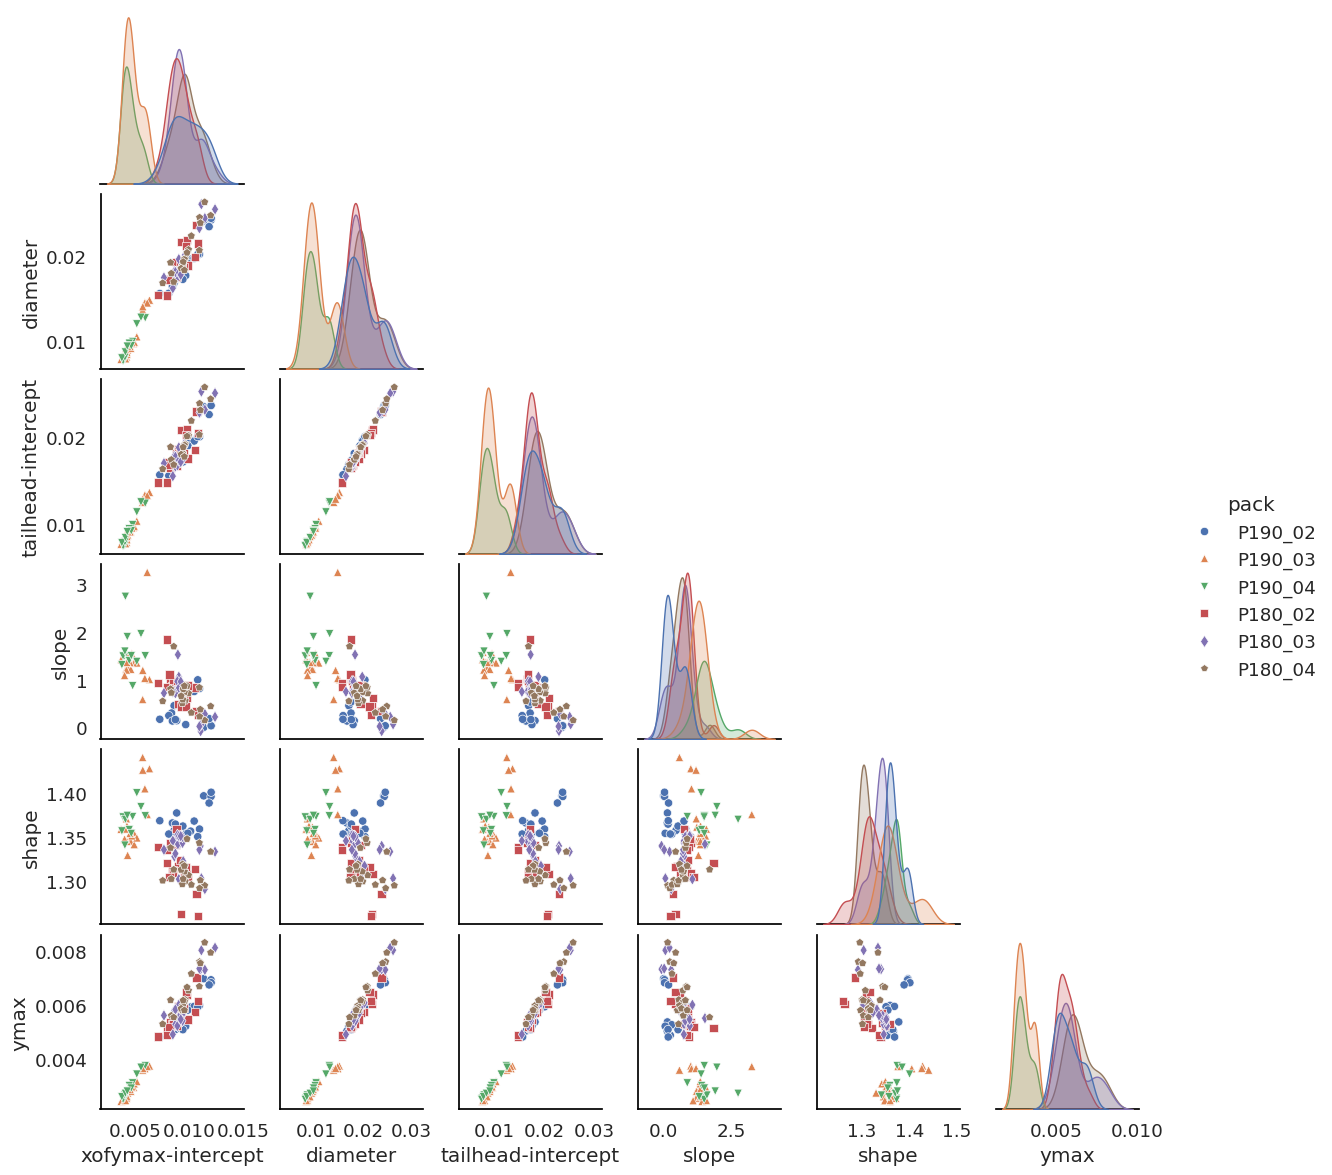

In [ ]:
# plot features and color by packs
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style({'axes.edgecolor': 'black'})
fig=sns.pairplot(featuresToPlot,diag_kind="kde",\
             x_vars=["xofymax-intercept","diameter","tailhead-intercept","slope","shape","ymax"],\
             y_vars=["xofymax-intercept","diameter","tailhead-intercept","slope","shape","ymax"],\
             hue="pack",size=2, markers = ['o', "^","v","s","d","p"],corner=True)
fig.savefig("Figures/Feature_pairplot.png")

#PCA

In [ ]:
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#define predictor and response variables
X = featuresToPlot[["xofymax-intercept","diameter","tailhead-intercept","slope","shape","ymax"]].dropna()

#scale X and apply PCA
X_scaled= StandardScaler().fit_transform(X)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf=principalDf.set_index(X.index)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.78927924, 0.13585152])

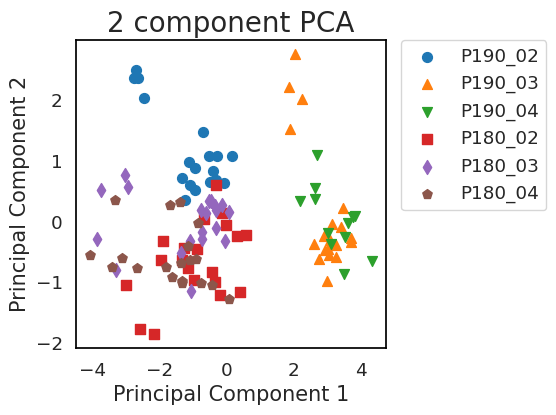

In [ ]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = ['P190_02','P190_03','P190_04','P180_02','P180_03','P180_04'] # to plot before or after
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']
labels=['o', "^","v","s","d","p"]
for target, color,label in zip(targets,colors,labels):
    indicesToKeep = principalDf.index.str.contains(target)
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color,marker=label
               , s = 50)
ax.legend(targets,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
fig.savefig("Figures/Feature_PCA.png")